<a href="https://colab.research.google.com/github/2006355/ALICE1/blob/with-five/Copy_of_Lab01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 01 

Upon completion of this lab, you will be able to:

* Understand and prepare your development environment to use OpenCV and python 
* Use Google Colab 
* Load and display images 
* Load and display videos 
* Extract frames (sample) from videos and save them to your local desk



## Development Environment

You can create your own environment in your machine. This will include installing python, and OpenCV using ‘pip install opencv’. Simplest possible way is to install Anaconda first, and work with Jupyter notebook. The other option is to use a cloud such as Google Colab. The two options are outlined below, I highly recommend using Option 2 to start with:

## Option 1: Set your working environment

* To install openCV in your Machine, follow the tutorial [Here](https://medium.com/@yukunpengba/comprehensive-python-opencv-tutorial-for-beginners-part-i-fd0293d52241)
* If you use Anaconda, you can be find the details at the following links useful to install openCV  [link](https://anaconda.org/conda-forge/opencv)

## Option 2: Using Google Colab (Recomended) 


* Google Colab is a great environment that gives you free computing power to run some complex Deep Learning Models. You don’t need to worry about installing certain libraries such as OpenCV, Tensorflow, Keras, etc… It is all ready for you to use. 

* With Colab, you can create your own notebooks,  share it, mount your Google Drive and the datasets stored over there. You can also upload your work from github into Colab with a one click, or vice versa. And of course, you can download your google colab notebooks once they are ready. 



## Using Colab 

Colab is easy to use, and a demo will be given to you through the lab time. The followoing steps below should get you going: It is important (although not a must) to set up your drive. In other words, you need to tell colab which folder you are using to store your notebook at before creating a notebook (your working environment):

1. First, go to your Google Drive and create new folder (better to be organised and put your notebooks in specific folders e.g. CM4126)
2. To create a new notebook, Choose New from the menu and then click on **Google Collaboratory**. If you can’t see this option, then click on the **More**, and it should be there
3. Once, you created your notebook, it is a good idea to give it a meaningful name. You can rename your notebook from its top left corner (e.g. rename *Untitled0.ipynb* to *lab01.ipynb*, etc...)
4. Final step is to setup your GPU, this should give you more computing power (often experiments will run faster). To do so is simple, from the notebook menu, choose **Runtime** and select from the drop down menu ‘Change runtime type’ and select GPU from the hardware accelerator drop down menu

Steps 1 to 4 above, are all you need to do to start using Colab for running deep models for computer vision tasks. However, if you want to look at some videos and other tutorials, then follow the links below:

* Here is a good tutorial on how to use it. Click [Here](https://towardsdatascience.com/getting-started-with-google-colab-f2fff97f594c)
* Good tutorial on setting up your Google Colab to work with Kaggle. Check this [tutorial](https://towardsdatascience.com/setting-up-kaggle-in-google-colab-ebb281b61463)
* Another useful tutorial [Here](https://towardsdatascience.com/10-tips-for-a-better-google-colab-experience-33f8fe721b82)
* Great [Video](https://www.youtube.com/watch?v=inN8seMm7UI) on how to use google colab

# Load and Display Images/ Videos

* Create a new notebook on Google Colab 
* Rename it to *lab01. Ipynb* 
* Implement in the code in the following link 


The code below loads displays and check the image dimension. The image is obtained from the https://thispersondoesnotexist.com/. Notice that *cv2* is actually the openCV Library, you can find more about it at this link https://opencv.org/

In [ ]:
import cv2 as cv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from PIL import Image

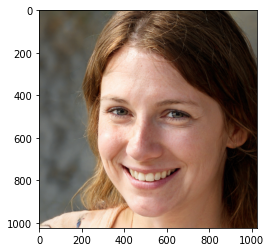

In [ ]:
# load an image into memory 
image = Image.open('/content/drive/MyDrive/Colab Notebooks/cOMPUTER VERSION/source/Data/dnte.jpeg')
plt.imshow(image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# convert the image into an array
image_arr = np.array(image)
# check the array shape
image_arr.shape

(1024, 1024, 3)

Notice that the above code returns the size of the image which is 1024 by 1024 by 3. The number *3* denotes the number of channels in the image (red, green, and blue). We can convert the above image into gray scale image as follows:

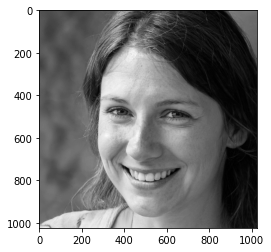

In [ ]:
gray = cv.cvtColor(image_arr,cv.COLOR_BGR2GRAY)
#show the gray image
plt.imshow(gray, cmap='gray')

## Image Channels (colors)

Notice, that you can also display specific channel of the image as follows: 

In [ ]:
red_channel = image_arr[:,:,0]
green_channel = image_arr[:,:,1]
blue_channel = image_arr[:,:,2]

Text(0.5, 1.0, 'Blue Channel')

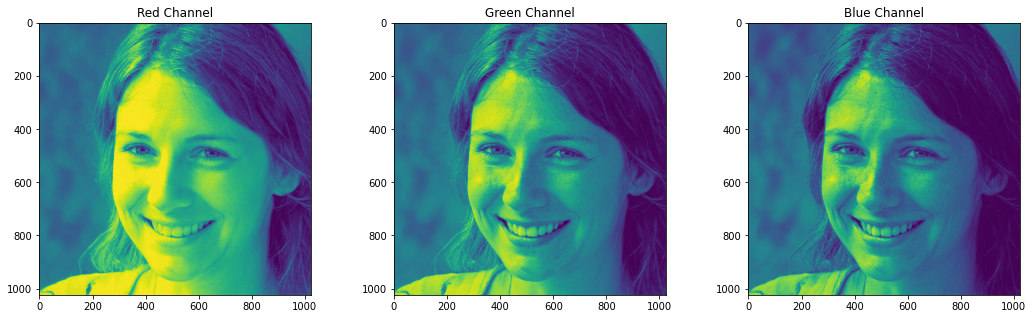

In [ ]:
plt.figure(figsize=[18,5])
plt.subplot(131);plt.imshow(red_channel);plt.title('Red Channel')
plt.subplot(132);plt.imshow(green_channel);plt.title('Green Channel')
plt.subplot(133);plt.imshow(blue_channel);plt.title('Blue Channel')

## Videos 

The code below loads a video and displays it in a separate window. The video will continue to play until reaching its end, or pressing **q**. Recall a video is simply a collection of images. 

Note: The path to the video. 

In [ ]:

# capture video 
cap = cv.VideoCapture('/content/drive/MyDrive/ColabNotebooks/cOMPUTER VERSION/source/Data/EMNIST_GAN_HALF.mp4')

# iterate over the video frames till either you press 'q' or end of the video is reached
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == True: 
        cv.imshow('frame',frame)
        if cv.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break
cap.release()
cv.destroyAllWindows()

With openCV, you can also read video files, extract some frames as save them as images on your local desk. Below, the code loads the video, and saves every 50th frame as an image. 

In [ ]:
# Opens the Video file
cap = cv.VideoCapture('/content/drive/MyDrive/Colab Notebooks/cOMPUTER VERSION/source/Data/EMNIST_GAN_HALF.mp4')
# how many frames in the file
length = int(cap.get(cv.CAP_PROP_FRAME_COUNT))
i=0
# sample every 50 frame and save as imaes
while(cap.isOpened()):
    ret, frame = cap.read()
    if ret == False:
        break
    if i%50==0:
        cv.imwrite('//content/drive/MyDrive/Colab Notebooks/cOMPUTER VERSION/source/Data/*.jpeg'+str(i)+'.jpg',frame)
    i+=1
 
cap.release()
cv.destroyAllWindows()

You can check the file names of the frames that were extracted and saved using the code below

In [ ]:
import glob

print(glob.glob("/content/drive/MyDrive/Colab Notebooks/cOMPUTER VERSION/source/Data/board.jpg")) 


['/content/drive/MyDrive/Colab Notebooks/cOMPUTER VERSION/source/Data/board.jpg']


* And you can display these frames as below

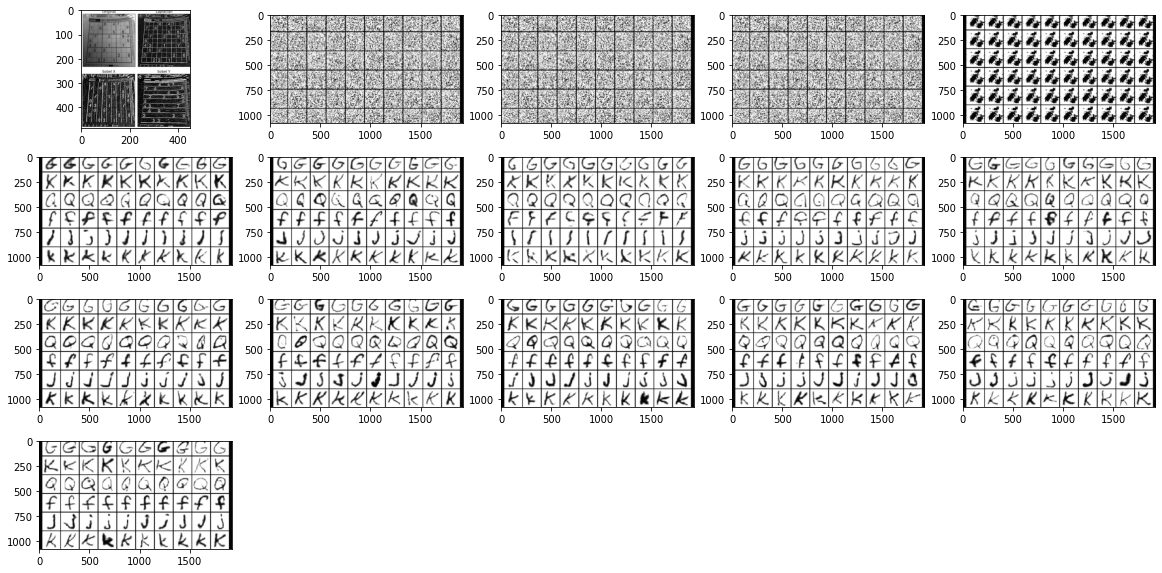

In [ ]:
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

images = []
for img_path in glob.glob('/content/drive/MyDrive/Colab Notebooks/cOMPUTER VERSION/source/Data/*.jpg'):
    images.append(mpimg.imread(img_path))

plt.figure(figsize=(20,10))
columns = 5
for i, image in enumerate(images):
    
      if i%5==0:
        plt.subplot(int(len(images) / columns + 1), columns, i + 1)
        plt.imshow(image)


## To Do


* Create a notebook in Google Colab and implement the code above
* You need to upload the images and the video into your gdrive, and you need to mount the drive so that the data can be found
* Update the code above to extract every fifth frame till frame 50 in the video